# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Censusdata.csv
2. I will be predicting whether an adult will have an income less than or equal to 50k. Label is income_binary
3. This is a supervised problem because we are using the income_binary column to guide the model's learning, and a clearly labeled target variable we are using to train the model. It is a classification problem because we are predicting a category (<=50k or >50k) rather than an exact number. This is a binary classification because there are just 2 possible outcomes we can classify the label as.
4. age,	workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex_selfID, capital-gain, capital-loss, hours-per-week, native-country
5. Predicting income can create value for a lot of professions. Auditors/analysts can use it to cross-check between certain financial records, policymakers can see if there's a high discrepancy contributing to lower income outcomes and target the problems, and even regular adults can use this model to see what is the most impactful features on their life and how they can increase their income.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
df.isnull().sum().sort_values(ascending=False) #many null values in age, workclass, occupation, hours-per-week, native-country

occupation        1843
workclass         1836
native-country     583
hours-per-week     325
age                162
fnlwgt               0
education            0
education-num        0
marital-status       0
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
income_binary        0
dtype: int64

In [4]:
df.shape[0] #1843 is highest null value in column, 32561 is total rows, 1843/32561 = 5.6% so impute them

32561

In [5]:
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True) #mode because categorical
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True) #mode because categorical
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True) #mode because categorical
df['hours-per-week'].fillna(df['hours-per-week'].median(), inplace=True) #median because numerical
df['age'].fillna(df['age'].median(), inplace=True) #median because numerical

df.isnull().sum() #cleaned null values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64

In [6]:
df.dtypes
df.drop(columns='fnlwgt', inplace=True)
df.drop(columns='education', inplace=True) #realized education-num and education are redundant, removed education becasue education-num is already numeric
#needed for one-hot encoding later: workclass, marital-status, object
df.dtypes

age               float64
workclass          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [7]:
features = df.columns.drop('income_binary')
df.head(20)
(df['capital-loss'] != 0).sum() #checked to see if all of capital-loss was just zeros to see if feature was necessary

1519

Outliers found: 8913


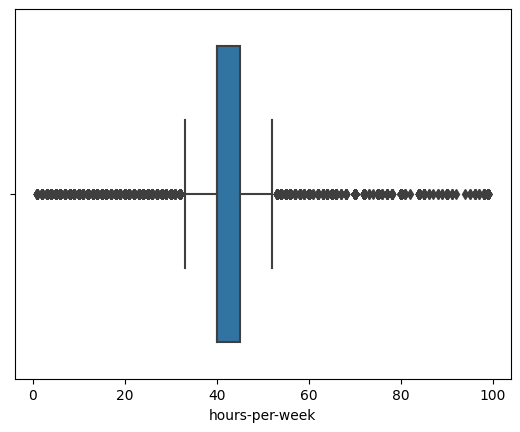

In [8]:
Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['hours-per-week'] < lower_bound) | (df['hours-per-week'] > upper_bound)]
print(f"Outliers found: {len(outliers)}")
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['hours-per-week'])
plt.show()


In [9]:
from scipy.stats.mstats import winsorize
df['hours-per-week'] = pd.Series(winsorize(df['hours-per-week'], limits=[0.01, 0.01])) #attempted to use winsorize
df['hours-per-week'] = df['hours-per-week'].clip(lower_bound, upper_bound) #using clip actually removed the outliers

outliers = df[(df['hours-per-week'] < lower_bound) | (df['hours-per-week'] > upper_bound)]
print(f"Outliers found: {len(outliers)}")

Outliers found: 0


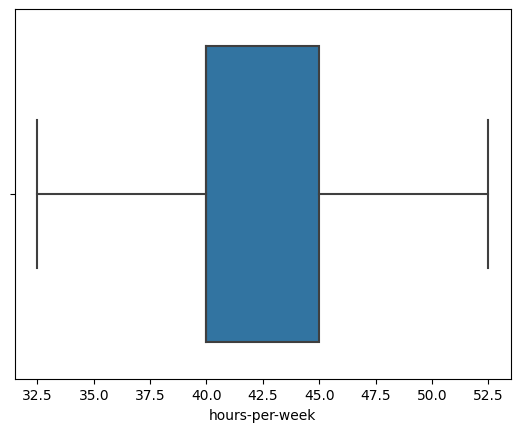

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['hours-per-week'])
plt.show() #shows the outliers have been fixed!

In [11]:
df.head(20)
df['relationship'].value_counts() #wanted to see what "not-in-family" meant in context

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [12]:
#workclass, marital-status, and a few more features are going to be needed to one-hot encoding
df.dtypes
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']
df = pd.get_dummies(df, columns=categorical_cols) #basically goign to make a new binary column for each categori in each column, used 1 to mean "this row has this category" and 0 for all others
print(df.shape)
df.head()

(32561, 89)


,age,education-num,capital-gain,capital-loss,hours-per-week,income_binary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,13,2174,0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,13,0,0,32.5,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,9,0,0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53.0,7,0,0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28.0,13,0,0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df['income_binary'].value_counts(normalize=True) # calculating imbalance

#i plan to address this imbalance using stratified train/test splits and evaluating performance with metrics other than accuracy

<=50K    0.75919
>50K     0.24081
Name: income_binary, dtype: float64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I do have a new feature list, I removed fnlwgt because it doesn't provide value for prediction, and the education column because it was redundant since we had an education-num already. I also considered dropping capital-loss because more than 95% of the values were 0, but decided to keep it because it could be used later and capital-gains is still included. The new list is: age, education-num, marital-status, workclass, occupation, relationship, race, sex_selfID, capital-gain, hours-per-week, native-country. I decided to keep these because they could have correlation with the income label and were cleaned data.

2. To prepare my model I applied handling missing values and imputed columns using mode and median based off of if they were numeric or categorical columns. I also detected outliers in hours-per-week using IQR method and attempted to use windsorize as we had done in the course previously, but couldn't actually augment the data so I ended up using .clip() which worked. I did one-hot encoding to all the categorical columns to make it friendly for the ML model. I dropped the redundant and non-predictive features as well.

3. The model I have chosen to work with is Logistic Regression because it works well with binary classification problems. I may also try Decision Trees or Random Forests for comparison depending on the performance.

4. My plan will to first be splitting the data into training and test tests. Then, I will fit the logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score. Then i will address the class imbalance i analyzed earlier by looking metrics other than accuracy. I hope to improve the model performance by truing different models, seeing if i can use cross-validation, or tuning hyperparameters. Finally, i will choose the best performing model based on the metrics.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [14]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [15]:
# Already performed majority of preperation of data in previous section, all that needs left is spliting the data

df['income_binary'] = df['income_binary'].map({'<=50K': 0, '>50K': 1}) #including this because later on had a value error when fitting the data. changed <=50k with 0 and >50k with 1

X = df.drop(columns='income_binary')
y = df['income_binary']

from sklearn.preprocessing import StandardScaler #implemented scaler after i got warning without it

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=.75, random_state=1234) #75% training / 25% testing split

In [16]:
#fit the model
lr_model = LogisticRegression(max_iter=1000) #increased in all metrics when i increased from 200 max_iter
lr_model.fit(X_train, y_train)

#make predictions
y_pred = lr_model.predict(X_test)

#analyze performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8468247144085493
Precision: 0.712468193384224
Recall: 0.5848563968668408

Confusion Matrix:
 [[5774  452]
 [ 795 1120]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6226
           1       0.71      0.58      0.64      1915

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.77      8141
weighted avg       0.84      0.85      0.84      8141



In [17]:
#using decision tree
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node
        depth := The maximum depth of the tree
        crit := The function to be used to measure the quality of a split. Default: gini.
    '''
    #creating DecisionTreeClassifier model
    model = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf=leaf)

    #fitting the model to the training data
    model.fit(X_train, y_train)

    #make predictions on test data
    class_label_predictions = model.predict(X_test)

    #compute the accuracy
    acc_score = accuracy_score(y_test, class_label_predictions)
    precision = precision_score(y_test, class_label_predictions)
    recall = recall_score(y_test, class_label_predictions)
    
    print(f"Accuracy: {acc_score}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

    return acc_score
    
#manual tests to see how the depth and the leaf hyperparameters output the best metrics
for depth in [3, 5, 10, 15]:
    for leaf in [1, 5, 10]:
        print(f"Depth: {depth}, Leaf: {leaf}")
        train_test_DT(X_train, X_test, y_train, y_test, leaf=leaf, depth=depth)

Depth: 3, Leaf: 1
Accuracy: 0.8412971379437415
Precision: 0.7405405405405405
Recall: 0.5007832898172324
Depth: 3, Leaf: 5
Accuracy: 0.8412971379437415
Precision: 0.7405405405405405
Recall: 0.5007832898172324
Depth: 3, Leaf: 10
Accuracy: 0.8412971379437415
Precision: 0.7405405405405405
Recall: 0.5007832898172324
Depth: 5, Leaf: 1
Accuracy: 0.8426483233018057
Precision: 0.7602627257799671
Recall: 0.4835509138381201
Depth: 5, Leaf: 5
Accuracy: 0.8428939933669083
Precision: 0.760655737704918
Recall: 0.4845953002610966
Depth: 5, Leaf: 10
Accuracy: 0.8425254882692544
Precision: 0.7604938271604939
Recall: 0.4825065274151436
Depth: 10, Leaf: 1
Accuracy: 0.8524751259059083
Precision: 0.7405660377358491
Recall: 0.5738903394255874
Depth: 10, Leaf: 5
Accuracy: 0.8539491462965237
Precision: 0.746938775510204
Recall: 0.5733681462140993
Depth: 10, Leaf: 10
Accuracy: 0.854931826556934
Precision: 0.7555710306406686
Recall: 0.566579634464752
Depth: 15, Leaf: 1
Accuracy: 0.8438766736273186
Precision: 0.6

In [18]:
#going to use gridsearchCV to use different hyperparemtors
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}
print('Running Grid Search...')

model = DecisionTreeClassifier(random_state=1234)

grid = GridSearchCV(model, param_grid=param_grid, cv=5) #5 cross-validation

grid_search = grid.fit(X_train, y_train)

print('Done')


Running Grid Search...
Done


In [19]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}
Accuracy: 0.8513696106129468
Precision: 0.7329808327825512
Recall: 0.57911227154047

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      6226
           1       0.73      0.58      0.65      1915

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



After preparing the dataset, scaling the features, and encoding the target column, I trained and evaluated 2 models: Logistic Regression and Decision Tree Classfier

Here are the Logistic Regression results:

Accuracy: 0.8468
Precision: 0.7125
Recall: 0.5849

Here are the Decision Tree Classifier Results, which also includes running GridSearchCV over tuning different parameters like max_depth, min_samples_leaf, and criterion:

Accuracy: 0.8514
Precision: 0.7330
Recall: 0.5791

The decision tree slightly outperformed logistic regression in terms of accuracy and precision. The recall was similar. 

To address underfitting/overfitting, I used train-test-split (75/25) to simulate real-world unseen data performance. I also manually tested different values of max_depth and min_samples_leaf. I also ran GridSearchCV with 5 cross-validation which helped reduce overfitting

Both models produced solid results on the dataset, though the Decision Tree had a greater performance most likely because of the ability to tune it with GridSearchCV. In a real-world setting Logistic Regression is more likely used as it is simple and is more common. If I had more time, I would try ensemble methods like Random Forest or Gradient Boosting. 